# Datafield Clustering

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1. clustering with numerical values

C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


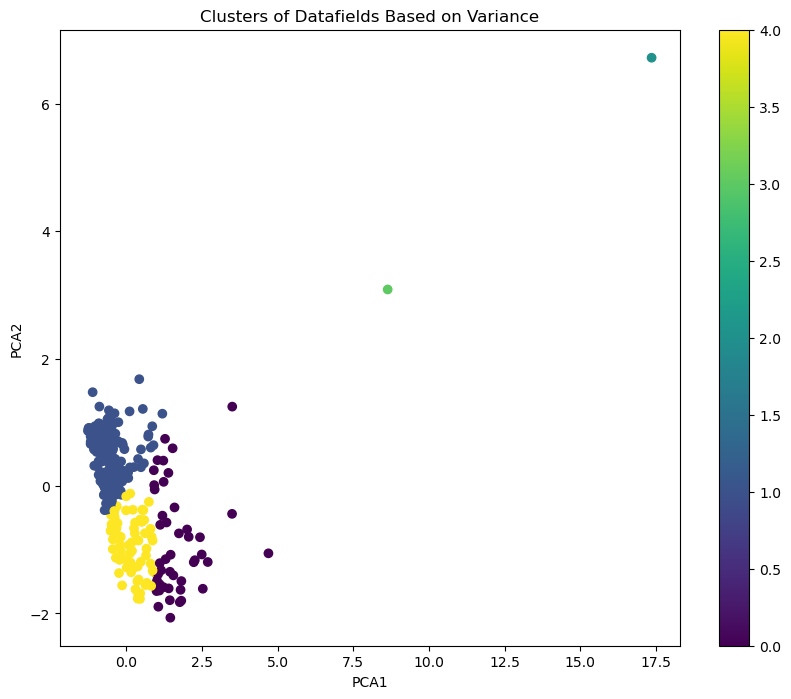

,id,description,coverage,userCount,alphaCount,Cluster
82,fn_def_tax_assets_liab_net_a,"Amount, after allocation of valuation allowanc...",0.7058,304,1278,0
0,fn_accrued_liab_a,Carrying value as of the balance sheet date of...,0.3934,359,1052,0
16,fn_antidilutive_securities_excl_from_eps_a,Securities (including those issuable pursuant ...,0.6007,340,883,0
8,fn_accum_oth_income_loss_net_of_tax_a,Accumulated change in equity from transactions...,0.6936,161,741,0
140,fn_new_shares_options_a,Number of share options (or share units) exerc...,0.6306,195,732,0
209,fnd2_a_dfdtxava,Amount of deferred tax assets for which it is ...,0.5993,222,696,0
9,fn_accum_oth_income_loss_net_of_tax_q,Accumulated change in equity from transactions...,0.6597,253,680,0
17,fn_antidilutive_securities_excl_from_eps_q,Securities (including those issuable pursuant ...,0.5838,193,624,0
287,fnd2_ebitfr,"EBIT, Foreign",0.3948,189,619,0
58,fn_comp_options_grants_a,Net number of share options (or share units) g...,0.6394,201,618,0


In [1]:
df = pd.read_csv('datafield.csv')

# Select the relevant columns for variance analysis
data = df[['coverage', 'userCount', 'alphaCount']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Perform KMeans clustering to identify groups of similar datafields
kmeans = KMeans(n_clusters=5)  
clusters = kmeans.fit_predict(pca_result)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters of Datafields Based on Variance')
plt.colorbar()
plt.show()

# Sort and filter by highest alphaCount within clusters
sorted_df = df.sort_values(by=['Cluster', 'alphaCount'], ascending=[True, False])

sorted_df_filtered = sorted_df[['id', 'description', 'coverage', 'userCount', 'alphaCount', 'Cluster']]
sorted_df_filtered.head(20)  # Display the top 20 significant datafields


In [2]:
sorted_df_filtered[]

,id,description,coverage,userCount,alphaCount,Cluster
82,fn_def_tax_assets_liab_net_a,"Amount, after allocation of valuation allowanc...",0.7058,304,1278,0
0,fn_accrued_liab_a,Carrying value as of the balance sheet date of...,0.3934,359,1052,0
16,fn_antidilutive_securities_excl_from_eps_a,Securities (including those issuable pursuant ...,0.6007,340,883,0
8,fn_accum_oth_income_loss_net_of_tax_a,Accumulated change in equity from transactions...,0.6936,161,741,0
140,fn_new_shares_options_a,Number of share options (or share units) exerc...,0.6306,195,732,0
...,...,...,...,...,...,...
189,fn_taxes_payable_a,Carrying value as of the balance sheet date of...,0.4462,36,86,4
187,fn_repurchased_shares_value_a,Shares repurchased and either retired or put i...,0.4936,23,84,4
259,fnd2_currfedtxexp,"Income Tax Expense, Current - Federal",0.5661,28,80,4
298,fnd2_propplteqmuflmeqmt,"PPE, Equipment, Useful Life, Minimum",0.4744,20,80,4


## 2. Clustering with text description

In [23]:
file_path = 'datafield.csv'
df = pd.read_csv(file_path)

descriptions = df['description']

for i in range(5):
    print(descriptions[i])

Carrying value as of the balance sheet date of obligations incurred and payable, pertaining to costs that are statutory in nature, are incurred on contractual obligations, or accumulate over time and for which invoices have not yet been received or will not be rendered.
Carrying value as of the balance sheet date of obligations incurred and payable, pertaining to costs that are statutory in nature, are incurred on contractual obligations, or accumulate over time and for which invoices have not yet been received or will not be rendered.
Carrying value as of the balance sheet date of obligations incurred and payable, pertaining to costs that are statutory in nature, are incurred on contractual obligations, or accumulate over time and for which invoices have not yet been received or will not be rendered.
Carrying value as of the balance sheet date of obligations incurred and payable, pertaining to costs that are statutory in nature, are incurred on contractual obligations, or accumulate o

In [3]:
# Convert the text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(descriptions)

C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


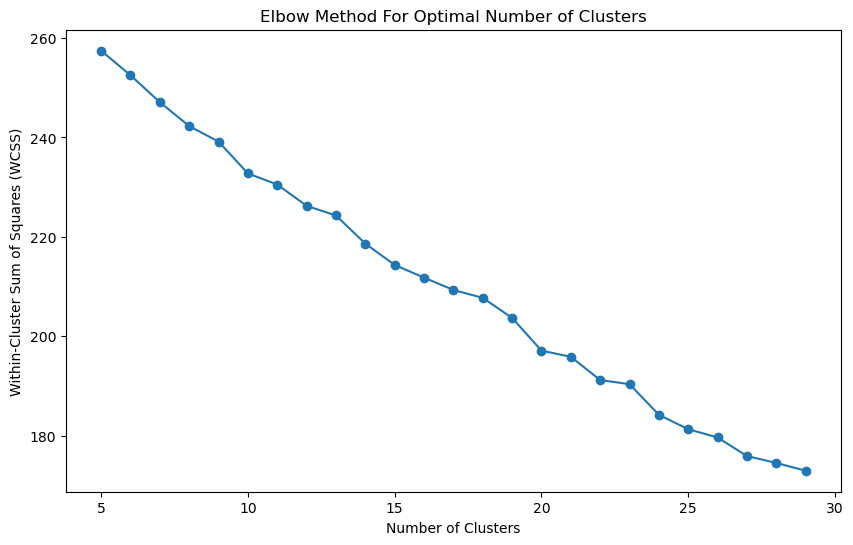

C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

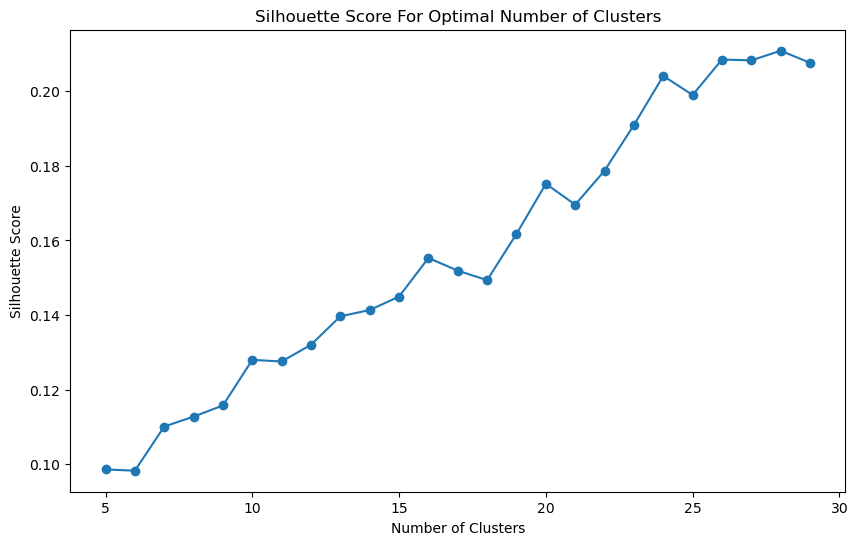

In [4]:
min_cluster, max_cluster = 2, 10

wcss = []
# iterate through certain numbers to observe optimal number for clusters
for i in range(min_cluster, max_cluster):
    # Perform KMeans clustering based on the TF-IDF features
    kmeans = KMeans(n_clusters=i, random_state=42) 
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(min_cluster, max_cluster), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

silhouette_scores = []
for i in range(min_cluster, max_cluster):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(min_cluster, max_cluster), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=5, random_state=42) 
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters

# Sort the dataframe by clusters and potentially by other metrics within the clusters
sorted_df = df.sort_values(by=['Cluster', 'alphaCount'], ascending=[True, False])

sorted_df[sorted_df['Cluster'] == 4]


C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,id,description,dataset,category,subcategory,region,delay,universe,type,coverage,turnover,userCount,alphaCount,themes,Cluster
157,157,fn_oth_income_loss_fx_transaction_and_tax_tran...,Amount after tax and reclassification adjustme...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.4260,NaN,1149,1571,[],4
82,82,fn_def_tax_assets_liab_net_a,"Amount, after allocation of valuation allowanc...","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.7058,NaN,304,1278,[],4
8,8,fn_accum_oth_income_loss_net_of_tax_a,Accumulated change in equity from transactions...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6936,NaN,161,741,[],4
209,209,fnd2_a_dfdtxava,Amount of deferred tax assets for which it is ...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.5993,NaN,222,696,[],4
9,9,fn_accum_oth_income_loss_net_of_tax_q,Accumulated change in equity from transactions...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6597,NaN,253,680,[],4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,fnd2_dbplanchgbnfolintcst,Defined Benefit Plan Change In Benefit Obligat...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.2593,NaN,11,60,[],4
264,264,fnd2_dbplanartonplas,"Defined Benefit Plan, Benefits Paid, Plan Assets","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.2514,NaN,10,54,[],4
263,263,fnd2_dbplanamtsrginblsh,The aggregate net amount recognized in the bal...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.2521,NaN,6,51,[],4
314,314,fnd2_unrgtxbnfdecresfsttwtxauth,Amount of decrease in unrecognized tax benefit...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3539,NaN,22,49,[],4


In [14]:
top_entries_per_cluster = sorted_df.groupby('Cluster').head(2)

top_entries_per_cluster
#print(top_entries_per_cluster[['id', 'description', 'Cluster']].head(2))

,Unnamed: 0,id,description,dataset,category,subcategory,region,delay,universe,type,coverage,turnover,userCount,alphaCount,themes,Cluster
16,16,fn_antidilutive_securities_excl_from_eps_a,Securities (including those issuable pursuant ...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6007,NaN,340,883,[],0
140,140,fn_new_shares_options_a,Number of share options (or share units) exerc...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6306,NaN,195,732,[],0
0,0,fn_accrued_liab_a,Carrying value as of the balance sheet date of...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3934,NaN,359,1052,[],1
287,287,fnd2_ebitfr,"EBIT, Foreign","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3948,NaN,189,619,[],1
127,127,fn_liab_fair_val_l1_a,"Liabilities Fair Value, Recurring, Level 1","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3604,NaN,2120,3183,[],2
18,18,fn_assets_fair_val_a,"Asset Fair Value, Recurring, Total","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3258,NaN,243,472,[],2
145,145,fn_op_lease_min_pay_due_in_3y_a,Amount of required minimum rental payments for...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6422,NaN,239,565,[],3
144,144,fn_op_lease_min_pay_due_in_2y_a,Amount of required minimum rental payments for...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6419,NaN,170,423,[],3
157,157,fn_oth_income_loss_fx_transaction_and_tax_tran...,Amount after tax and reclassification adjustme...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.4260,NaN,1149,1571,[],4
82,82,fn_def_tax_assets_liab_net_a,"Amount, after allocation of valuation allowanc...","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.7058,NaN,304,1278,[],4


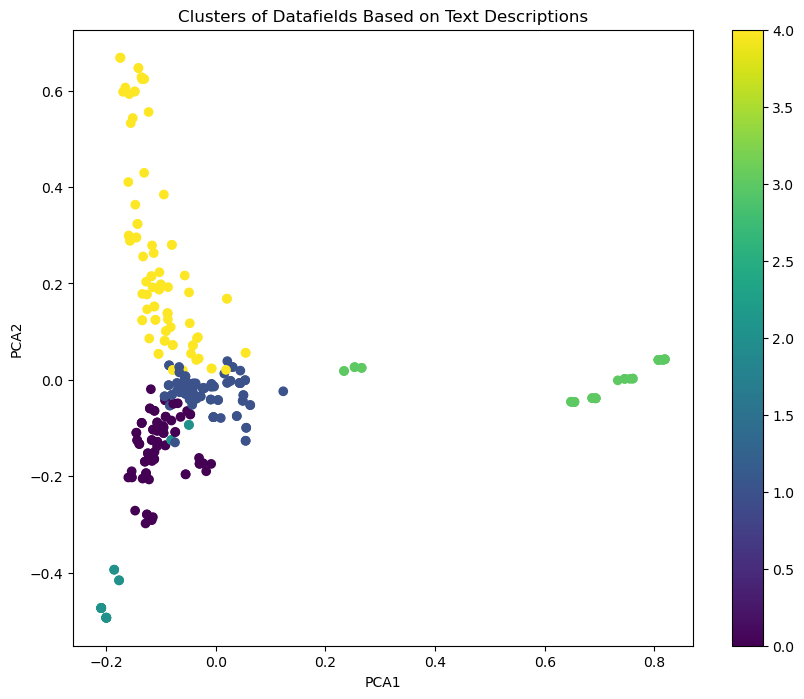

In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters of Datafields Based on Text Descriptions')
plt.colorbar()
plt.show()

# 3. Clustering with ID

In [4]:
file_path = 'datafield.csv'
df = pd.read_csv(file_path)

In [5]:
descriptions = df['id']
descriptions = [x.replace('_', ' ') for x in descriptions]

for i in range(5):
    print(descriptions[i])

fn accrued liab a
fn accrued liab curr a
fn accrued liab curr q
fn accrued liab q
fn accum depr depletion and amortization ppne a


In [6]:
# Convert the text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(descriptions)

C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


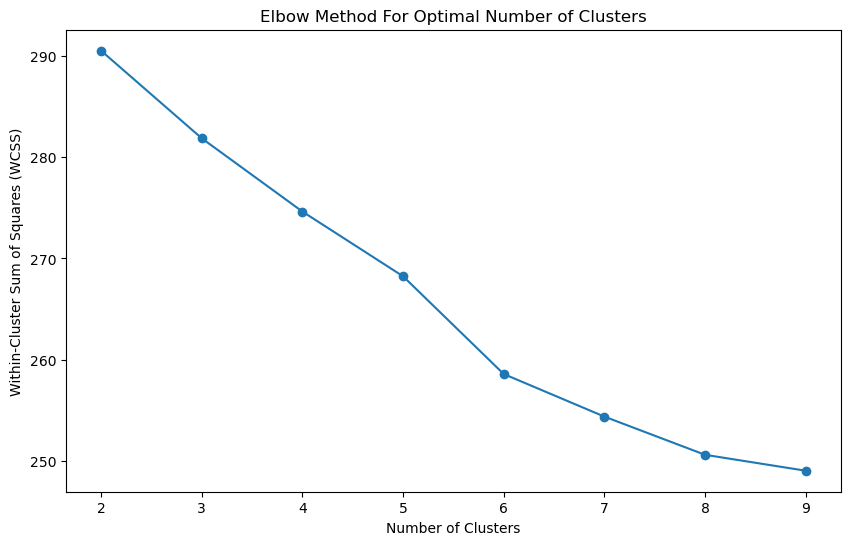

C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csia7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

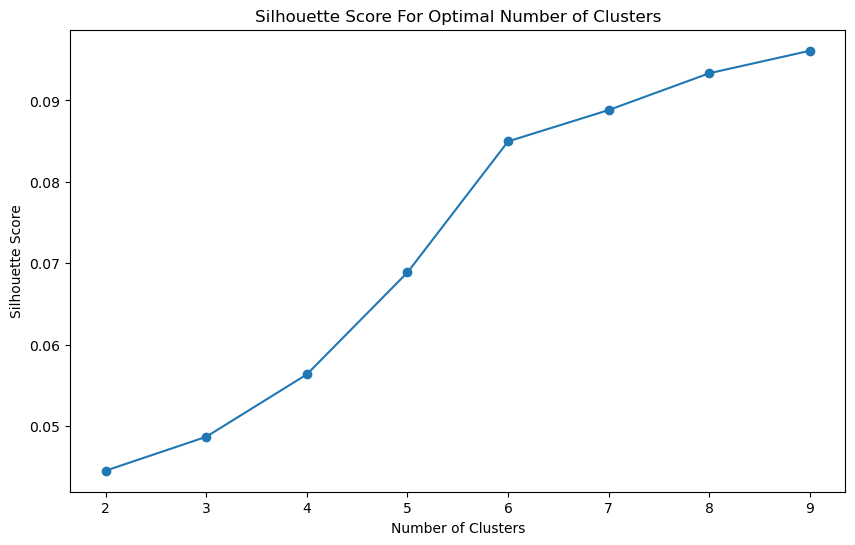

In [7]:
min_cluster, max_cluster = 2, 10

wcss = []
# iterate through certain numbers to observe optimal number for clusters
for i in range(min_cluster, max_cluster):
    # Perform KMeans clustering based on the TF-IDF features
    kmeans = KMeans(n_clusters=i, random_state=42) 
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(min_cluster, max_cluster), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

silhouette_scores = []
for i in range(min_cluster, max_cluster):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(min_cluster, max_cluster), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42) 
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters

# Sort the dataframe by clusters and potentially by other metrics within the clusters
sorted_df = df.sort_values(by=['Cluster', 'alphaCount'], ascending=[True, False])

sorted_df[sorted_df['Cluster'] == 4]

,Unnamed: 0,id,description,dataset,category,subcategory,region,delay,universe,type,coverage,turnover,userCount,alphaCount,themes,Cluster
127,127,fn_liab_fair_val_l1_a,"Liabilities Fair Value, Recurring, Level 1","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3604,NaN,2120,3183,[],4
0,0,fn_accrued_liab_a,Carrying value as of the balance sheet date of...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3934,NaN,359,1052,[],4
1,1,fn_accrued_liab_curr_a,Carrying value as of the balance sheet date of...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3644,NaN,157,610,[],4
3,3,fn_accrued_liab_q,Carrying value as of the balance sheet date of...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3650,NaN,148,486,[],4
2,2,fn_accrued_liab_curr_q,Carrying value as of the balance sheet date of...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3403,NaN,129,478,[],4
18,18,fn_assets_fair_val_a,"Asset Fair Value, Recurring, Total","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3258,NaN,243,472,[],4
130,130,fn_liab_fair_val_l2_q,"Liabilities Fair Value, Recurring, Level 2","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.4041,NaN,188,430,[],4
99,99,fn_employee_related_liab_q,Total of the carrying values as of the balance...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3552,NaN,105,417,[],4
25,25,fn_assets_fair_val_q,"Asset Fair Value, Recurring, Total","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3347,NaN,200,414,[],4
23,23,fn_assets_fair_val_l3_a,"Asset Fair Value, Recurring, Level 3","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3873,NaN,118,400,[],4


In [10]:
top_entries_per_cluster = sorted_df.groupby('Cluster').head(2)

top_entries_per_cluster
#print(top_entries_per_cluster[['id', 'description', 'Cluster']].head(2))

,Unnamed: 0,id,description,dataset,category,subcategory,region,delay,universe,type,coverage,turnover,userCount,alphaCount,themes,Cluster
16,16,fn_antidilutive_securities_excl_from_eps_a,Securities (including those issuable pursuant ...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6007,NaN,340,883,[],0
140,140,fn_new_shares_options_a,Number of share options (or share units) exerc...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.6306,NaN,195,732,[],0
157,157,fn_oth_income_loss_fx_transaction_and_tax_tran...,Amount after tax and reclassification adjustme...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.4260,NaN,1149,1571,[],1
82,82,fn_def_tax_assets_liab_net_a,"Amount, after allocation of valuation allowanc...","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.7058,NaN,304,1278,[],1
165,165,fn_ppne_gross_a,"Amount before accumulated depreciation, deplet...","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.5997,NaN,81,362,[],2
108,108,fn_finite_lived_intangible_assets_net_a,"Finite Lived Intangible Assets, Net","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.4505,NaN,191,341,[],2
209,209,fnd2_a_dfdtxava,Amount of deferred tax assets for which it is ...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.5993,NaN,222,696,[],3
287,287,fnd2_ebitfr,"EBIT, Foreign","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3948,NaN,189,619,[],3
127,127,fn_liab_fair_val_l1_a,"Liabilities Fair Value, Recurring, Level 1","{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3604,NaN,2120,3183,[],4
0,0,fn_accrued_liab_a,Carrying value as of the balance sheet date of...,"{'id': 'fundamental2', 'name': 'Report Footnot...","{'id': 'fundamental', 'name': 'Fundamental'}","{'id': 'fundamental-footnotes', 'name': 'Footn...",USA,1,TOP3000,MATRIX,0.3934,NaN,359,1052,[],4


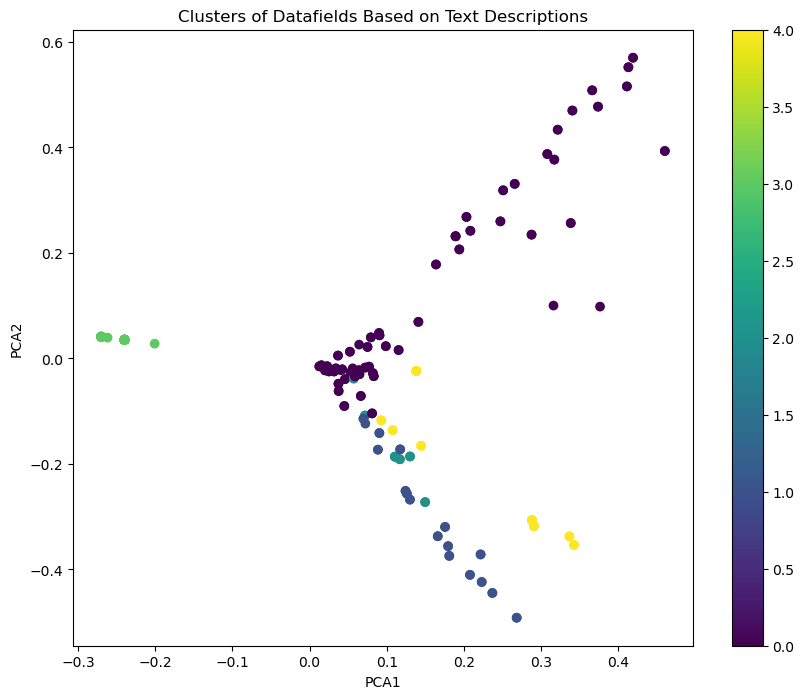

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters of Datafields Based on Text Descriptions')
plt.colorbar()
plt.show()